# Training HLR shear model

In [2]:
import shear_util as su
import pandas as pd
import numpy as np
import scipy
import galsim

gsp = galsim.GSParams(maximum_fft_size=150000)
np.random.seed(2019)

ngal = 200
e_list = np.linspace(0.0,0.97,ngal)

galsim_scale=0.01
# the smaller the scale the more accurate estimated hlrs by galsim
# but it'll also lead to more nan results for high e's

hlr_preshear = 1.0 # for the round version before shearing
data = {'e':e_list}

for magnify in [True, False]:
    
    hlr_quad_list = []
    hlr_wh_list = []
    hlr_galsim_list = []
    
    for e in e_list:
        phi = np.pi*np.random.random(1)[0] # we only need one
        e1 = e*np.cos(2*phi)
        e2 = e*np.sin(2*phi)
        mu = 1./(1-e**2)
        sigma_round = hlr_preshear/np.sqrt(2.*np.log(2))

        if magnify: # equivalent of galsim.lens() = galsim.shear() + galsim.magnify()
            # https://galsim-developers.github.io/GalSim/_build/html/gsobject.html#galsim.GSObject.lens
            sigma_x = sigma_round/(1-e)
            sigma_y = sigma_round/(1+e)
        else: # equivalent of galsim.shear() -- area or "total" flux preseved
            # https://galsim-developers.github.io/GalSim/_build/html/gsobject.html#galsim.GSObject.shear
            sigma_x = sigma_round * np.sqrt((1+e)/(1-e))
            sigma_y = sigma_round * np.sqrt((1-e)/(1+e))

        # method 1: integrating analytic equation using quad methos
        hlr_quad = su.get_hlr_postshear(hlr_preshear, e, magnify=magnify)

        # method 2: good approximation using the Wilson-Hilferty transformation - eq. 18 of https://apps.dtic.mil/dtic/tr/fulltext/u2/1043284.pdf
        hlr_wh = np.sqrt( (sigma_x**2+sigma_y**2)*(1-2*(sigma_x**4+sigma_y**4)/9/(sigma_x**2+sigma_y**2)**2)**3 )

        # method 3: galsim image analysis
        gal = galsim.Gaussian(half_light_radius=hlr_preshear, gsparams=gsp)
        gal = gal.shear(g1=e1, g2=e2)

        if magnify:
            gal = gal.magnify(mu)

        hlr_galsim = gal.calculateHLR(scale=galsim_scale)

        # print some stat
        print(f'[e={e:.3f}, magnify={magnify}] analytic/quad light_frac(r={hlr_quad:.3f}): {su.prob_bivariate_gaussian(0, hlr_quad, sigma_x, sigma_y):.4f},'+
                       f' galsim light_frac(r={hlr_galsim:.3f}): {su.prob_bivariate_gaussian(0, hlr_galsim, sigma_x, sigma_y):.4f}')

        # append
        hlr_quad_list.append(hlr_quad)
        hlr_wh_list.append(hlr_wh)
        hlr_galsim_list.append(hlr_galsim)

    postfix = '_magnified' if magnify else ''
    data['scale_analytic'+postfix] = hlr_quad_list
    data['scale_galsim'+postfix] = hlr_galsim_list
    data['scale_wh'+postfix] = hlr_wh_list

[e=0.000, magnify=True] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.005, magnify=True] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.010, magnify=True] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.015, magnify=True] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.019, magnify=True] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.024, magnify=True] analytic/quad light_frac(r=1.001): 0.5000, galsim light_frac(r=1.001): 0.5000
[e=0.029, magnify=True] analytic/quad light_frac(r=1.001): 0.5000, galsim light_frac(r=1.001): 0.5000
[e=0.034, magnify=True] analytic/quad light_frac(r=1.001): 0.5000, galsim light_frac(r=1.001): 0.5000
[e=0.039, magnify=True] analytic/quad light_frac(r=1.001): 0.5000, galsim light_frac(r=1.001): 0.5000
[e=0.044, magnify=True] analytic/quad light_frac(r=1.002): 0.5000, galsim light_fr

/usr/local/anaconda3/lib/python3.7/site-packages/galsim/image.py:1446: RuntimeWarning: invalid value encountered in sqrt
  hlr = np.sqrt(hlrsq) * self.scale


[e=0.970, magnify=True] analytic/quad light_frac(r=19.100): 0.5000, galsim light_frac(r=nan): 0.0000
[e=0.000, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.005, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.010, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.015, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.019, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.024, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.029, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.034, magnify=False] analytic/quad light_frac(r=1.000): 0.5000, galsim light_frac(r=1.000): 0.5000
[e=0.039, magnify=False] analytic/quad light_frac(r=1.001): 0.5000, galsim 

## Save the training data

In [3]:
# Create pandas DataFrame.
df = pd.DataFrame(data)
df.to_csv('hlrshear.csv', index=False)
df

,e,scale_analytic_magnified,scale_galsim_magnified,scale_wh_magnified,scale_analytic,scale_galsim,scale_wh
0,0.000000,1.000000,0.999992,1.006604,1.000000,0.999992,1.006604
1,0.004874,1.000020,1.000009,1.006622,1.000008,0.999995,1.006610
2,0.009749,1.000080,1.000071,1.006675,1.000033,1.000026,1.006628
3,0.014623,1.000181,1.000177,1.006765,1.000074,1.000068,1.006657
4,0.019497,1.000322,1.000294,1.006891,1.000132,1.000148,1.006699
...,...,...,...,...,...,...,...
195,0.950503,11.581690,11.581738,11.780171,3.598627,3.598750,3.660298
196,0.955377,12.845067,12.845270,13.064788,3.794299,3.794396,3.859202
197,0.960251,14.418514,14.418518,14.664739,4.024742,4.024721,4.093473
198,0.965126,16.432044,16.432042,16.712242,4.301698,4.301530,4.375050


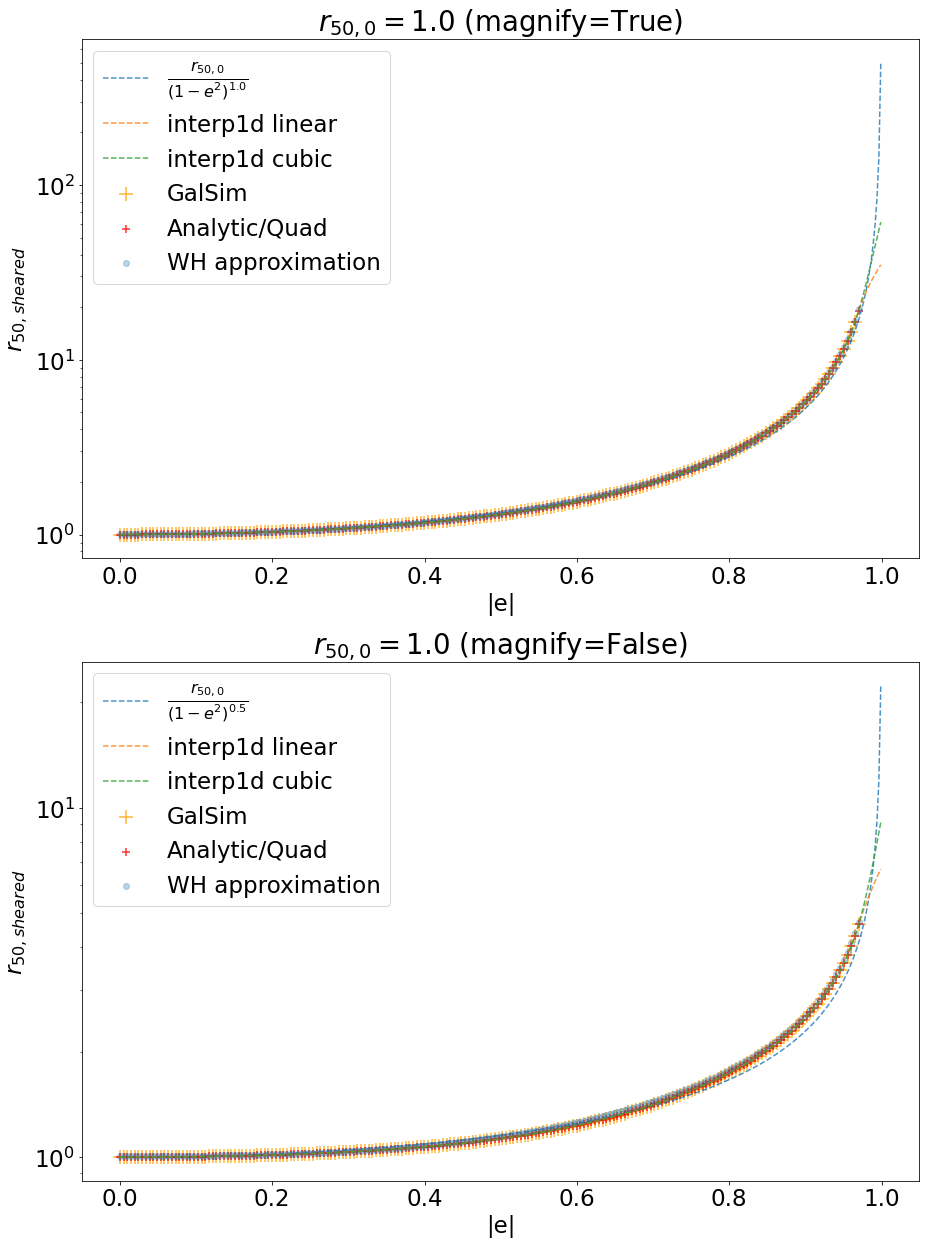

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
matplotlib.rcParams.update({'font.size': 23})

fig, axs = plt.subplots(2,figsize=(15,21))
e_list_fine = np.linspace(0, 0.999, num=400, endpoint=True)

for i, magnify in enumerate([True, False]):

    postfix = '_magnified' if magnify else ''
    f = interp1d(df['e'], df['scale_analytic'+postfix], bounds_error=False, fill_value='extrapolate')
    f2 = interp1d(df['e'], df['scale_analytic'+postfix], kind='cubic', bounds_error=False, fill_value='extrapolate')
    
    axs[i].scatter(df['e'], df['scale_galsim'+postfix], marker='+', facecolors='orange', edgecolors='orange', label='GalSim', s=200, alpha=0.8)
    axs[i].scatter(df['e'], df['scale_analytic'+postfix], facecolors='red', label='Analytic/Quad', marker='+', s=50, alpha=0.8)

    axs[i].scatter(df['e'], df['scale_wh'+postfix], label='WH approximation', alpha=0.3)
    exponent = 1.0 if magnify else 0.5
    axs[i].plot(e_list_fine, 1/(1-e_list_fine**2)**exponent, '--', alpha=0.8, label=f'$\\frac{{r_{{50, 0}}}}{{(1-e^2)^{{{exponent}}}}}$')
    axs[i].plot(e_list_fine, f(e_list_fine), '--', alpha=0.8, label='interp1d linear')
    axs[i].plot(e_list_fine, f2(e_list_fine), '--', alpha=0.8, label='interp1d cubic')

    axs[i].legend()
    axs[i].set_xlabel('|e|')
    axs[i].set_ylabel(r'$r_{50, sheared}$')
    axs[i].set_title(f'$r_{{50, 0}}=1.0$ (magnify={magnify})')
    axs[i].set_yscale('log');

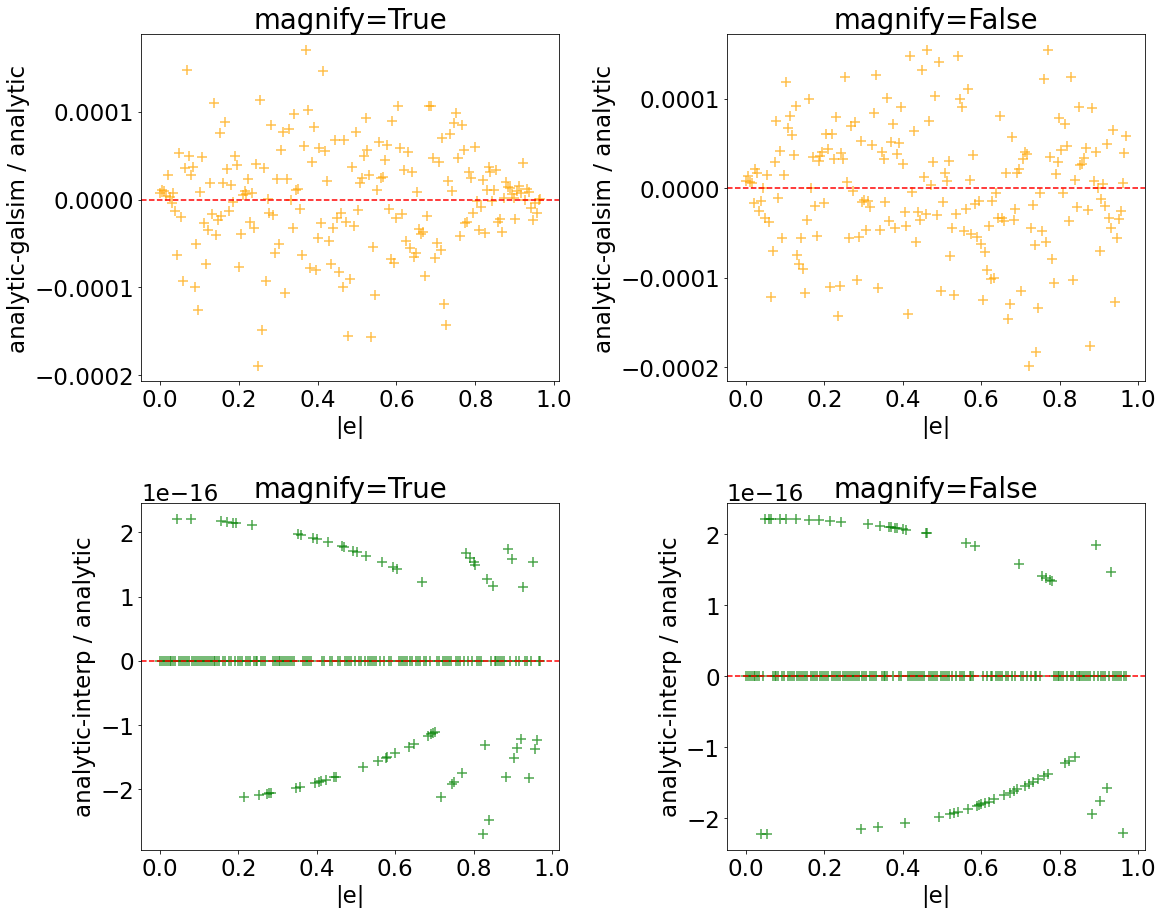

In [6]:
fig, axs = plt.subplots(2,2,figsize=(18,15))
plt.subplots_adjust(wspace=0.4, hspace=0.35)

for i, magnify in enumerate([True, False]):
    postfix = '_magnified' if magnify else ''
    f2 = interp1d(df['e'], df['scale_analytic'+postfix], kind='cubic', bounds_error=False, fill_value='extrapolate')
    axs[0,i].scatter(df['e'], (df['scale_analytic'+postfix]-df['scale_galsim'+postfix])/df['scale_analytic'+postfix],
                     marker='+', facecolors='orange', edgecolors='orange', s=100, alpha=0.7)
    axs[1,i].scatter(df['e'], (df['scale_analytic'+postfix]-f2(e_list))/df['scale_analytic'+postfix],
                     marker='+', facecolors='green', edgecolors='green', s=100, alpha=0.7)

    axs[0,i].axhline(y=0.0, color='r', linestyle='--')
    axs[1,i].axhline(y=0.0, color='r', linestyle='--')
    
    axs[0,i].set_xlabel('|e|')
    axs[1,i].set_xlabel('|e|')
    
    axs[0,i].set_title(f'magnify={magnify}')
    axs[1,i].set_title(f'magnify={magnify}')
    
    axs[0,i].set_ylabel('analytic-galsim / analytic');
    axs[1,i].set_ylabel('analytic-interp / analytic');

# Now test HLRShearModel

In [7]:
from shear_util import HLRShearModel

hsm = HLRShearModel('hlrshear.csv')
hsm.get_hlr_preshear([1.39,2.00,0.87],[0.18,0.75,0],magnify=False)

array([1.37384308, 1.2899341 , 0.87      ])

In [11]:
hsm.get_hlr_preshear([1.39,2.00,0.87],[0.18,0.75,0],magnify=True)

array([1.35140357, 0.85321121, 0.87      ])

In [8]:
# test - we should get 1.995 back
hsm.get_hlr_preshear(hsm.get_hlr_postshear(1.995,0.66,False),0.66,False)

1.995

In [9]:
hsm.get_hlr_postshear(hsm.get_hlr_preshear(1.995,0.66,False),0.66,False)

1.995